<a href="https://colab.research.google.com/github/kafSaugat7/Fuzzy_Logic/blob/main/restaurant_tipping_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=b1b6f7300f8f8d7c140ed44c75c3c57b1563cfec78259749838f3eb020774e46
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [4]:
#input variables
food_quality=ctrl.Antecedent(np.arange(0,11,1),'food_quality')
service_quality=ctrl.Antecedent(np.arange(0,11,1),'service_quality')
ambiance=ctrl.Antecedent(np.arange(0,11,1),'ambiance')

In [5]:
#output variables
tip=ctrl.Consequent(np.arange(0,31,1),'tip')

In [38]:
#membership function for input variable
food_quality['poor']=fuzz.trimf(food_quality.universe,[0,0,5])
food_quality['average']=fuzz.trimf(food_quality.universe,[0,5,10])
food_quality['good']=fuzz.trimf(food_quality.universe,[5,10,10])



In [35]:
service_quality['poor']=fuzz.trimf(service_quality.universe,[0,0,5])
service_quality['average']=fuzz.trimf(service_quality.universe,[0,5,5])
service_quality['good']=fuzz.trimf(service_quality.universe,[5,10,10])


In [36]:
ambiance['poor'] = fuzz.trimf(ambiance.universe, [0, 0, 5])
ambiance['average'] = fuzz.trimf(ambiance.universe, [0, 5, 10])
ambiance['good'] = fuzz.trimf(ambiance.universe, [5, 10, 10])


In [41]:
#membership function for output variable
tip['low']=fuzz.trimf(tip.universe,[0,0,15])
tip['medium']=fuzz.trimf(tip.universe,[0,15,30])
tip['high']=fuzz.trimf(tip.universe,[15,30,30])

In [42]:
# Define the 12 rules
rule1 = ctrl.Rule(food_quality['poor'] & service_quality['poor'] & ambiance['poor'], tip['low'])
rule2 = ctrl.Rule(food_quality['poor'] & service_quality['poor'] & ambiance['average'], tip['low'])
rule3 = ctrl.Rule(food_quality['poor'] & service_quality['average'] & ambiance['poor'], tip['low'])
rule4 = ctrl.Rule(food_quality['average'] & service_quality['poor'] & ambiance['poor'], tip['low'])
rule5 = ctrl.Rule(food_quality['average'] & service_quality['average'] & ambiance['average'], tip['medium'])
rule6 = ctrl.Rule(food_quality['average'] & service_quality['average'] & ambiance['good'], tip['medium'])
rule7 = ctrl.Rule(food_quality['average'] & service_quality['good'] & ambiance['average'], tip['medium'])
rule8 = ctrl.Rule(food_quality['good'] & service_quality['average'] & ambiance['average'], tip['medium'])
rule9 = ctrl.Rule(food_quality['good'] & service_quality['good'] & ambiance['poor'], tip['medium'])
rule10 = ctrl.Rule(food_quality['good'] & service_quality['good'] & ambiance['average'], tip['high'])
rule11 = ctrl.Rule(food_quality['good'] & service_quality['good'] & ambiance['good'], tip['high'])
rule12 = ctrl.Rule(food_quality['average'] & service_quality['good'] & ambiance['good'], tip['high'])








Recommended tip percentage: 20.18%


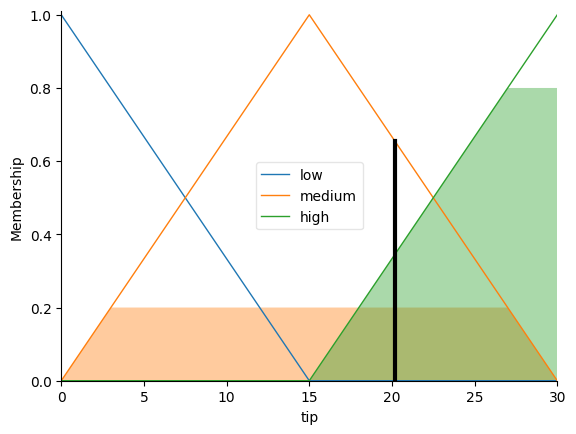

In [43]:
# Create and simulate the fuzzy control system
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                   rule7, rule8, rule9, rule10, rule11, rule12])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Example usage
tipping.input['food_quality'] = 9
tipping.input['service_quality'] = 9
tipping.input['ambiance'] = 9
tipping.compute()

print(f"Recommended tip percentage: {tipping.output['tip']:.2f}%")

# Visualize the result

tip.view(sim=tipping)